# Simple linear regression - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Create a scatter plot (with or without a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: In this exercise, the dependent variable is 'price', while the independent variable is 'size'.

Good luck!

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid")

## Load the data

In [3]:
data = pd.read_csv("../datasets/real_estate_price_size.csv")
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Create the regression

### Declare the dependent and the independent variables

In [6]:
x1 = data["size"]
y = data["price"]

### Explore the data

In [7]:
x1.shape

(100,)

### Transform the inputs into a matrix (2D object)

In [8]:
x_matrix = x1.values.reshape(-1, 1)
x_matrix.shape

(100, 1)

### Regression itself

In [9]:
reg = LinearRegression()
reg.fit(x_matrix, y)

LinearRegression()

### Calculate the R-squared

In [10]:
r_squared = reg.score(x_matrix, y)
r_squared

0.7447391865847587

### Find the intercept

In [11]:
intercept = reg.intercept_
intercept

101912.60180122912

### Find the coefficients

In [12]:
coefs = reg.coef_
coefs

array([223.17874259])

### Making predictions

You find an apartment online with a size of 750 sq.ft.

All else equal what should be its price according to the model?

In [17]:
new_data = pd.DataFrame({"Size": [750]})
new_data["Predicted Values"] = reg.predict(new_data[["Size"]])
new_data

c:\Users\JBS-LAB\.conda\envs\ds_env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,Size,Predicted Values
0,750,269296.658747


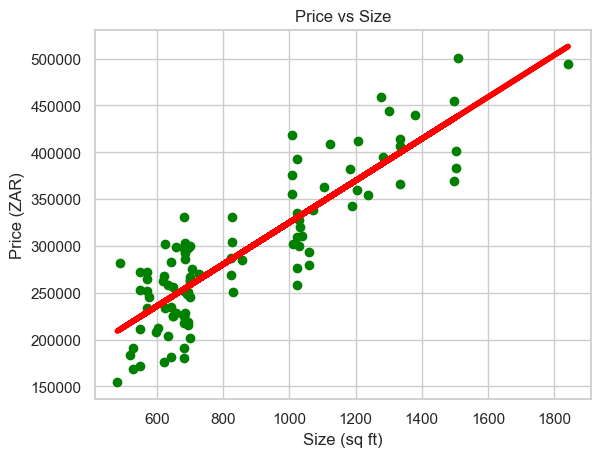

In [21]:
plt.scatter(x1, y, color="green", label="Data Points")
yhat = coefs* x1 + intercept
fig = plt.plot(x1, yhat, lw= 4, color="red", label="Regression Line")
plt.title("Price vs Size")
plt.xlabel("Size (sq ft)")
plt.ylabel("Price (ZAR)")
plt.show()